In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
from tqdm import tqdm

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
train_df_ = pd.read_csv("/content/drive/My Drive/Midterm Project/data/train.csv")
test_df_ = pd.read_csv("/content/drive/My Drive/Midterm Project/data/test.csv")
class_map_df = pd.read_csv("/content/drive/My Drive/Midterm Project/data/class_map.csv")

In [ ]:
train_df0 = pd.read_parquet("/content/drive/My Drive/Midterm Project/data/train_image_data_0.parquet").drop(['image_id'], axis=1, inplace=False)
test_df0 = pd.read_parquet("/content/drive/My Drive/Midterm Project/data/test_image_data_0.parquet").drop(['image_id'], axis=1, inplace=False)

#train_df1 = pd.read_parquet("/content/drive/My Drive/Midterm Project/data/train_image_data_1.parquet").drop(['image_id'], axis=1, inplace=False)
#train_df2 = pd.read_parquet("/content/drive/My Drive/Midterm Project/data/train_image_data_2.parquet").drop(['image_id'], axis=1, inplace=False)
#train_df3 = pd.read_parquet("/content/drive/My Drive/Midterm Project/data/train_image_data_3.parquet").drop(['image_id'], axis=1, inplace=False)

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
print('TensorFlow version: {}'.format(tf.__version__))

TensorFlow 2.x selected.
TensorFlow version: 2.1.0


In [ ]:
print(train_df0.shape)

(50210, 32332)


In [ ]:
heigth = 137;
width = 236;
X_train_full = train_df0.values.reshape((-1,heigth,width))
#X_train_full = train_df0.values.reshape((-1,heigth,width,1))
#X_train_1 = train_df1.values
#X_train_2 = train_df2.values
#X_train_3 = train_df3.values
#X_train_full_flat = np.vstack((X_train_0,X_train_1,X_train_2,X_train_3))

#_train_full=X_train_full_flat.reshape(-1,heigth,width,1);
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
#y_train_full = train_df_['grapheme_root'][:50210];
y_train_full = train_df_['grapheme_root'][:50210]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [ ]:
train_df_.head()

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো


In [ ]:
import numpy as np

def get_bounding_box(image):
  a,b = image.shape
  
  down = 0
  while (np.any(image[down,:] < 200) == False) and (down < a):
    down += 1

  up = a-1
  while (np.any(image[up,:] < 200) == False) and (up >= 0):
    up -= 1
  
  left = 0
  while (np.any(image[:,left] < 200) == False) and (left < b):
    left += 1

  right = b-1
  while (np.any(image[:,right] < 200) == False) and (right >= 0):
    right -= 1

  # in order to get the index of the last row/column that was actually zero
  down = max(down-1,0)
  up = min(up+1,a-1)
  left = max(left- 1,0)
  right = min(right+1,b-1)

  return (down,up,left,right)  

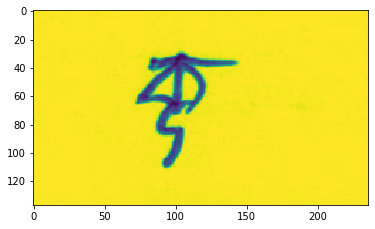

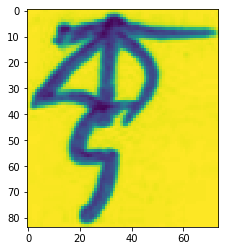

In [ ]:
import matplotlib.pyplot as plt
from skimage.transform import resize

def resize_bounding_box(graph_image):
  a,b,c,d = get_bounding_box(graph_image)
  plt.figure()
  plt.imshow(graph_image)
  plt.show()
  plt.figure()
  plt.imshow(graph_image[a:b+1,c:d+1])
  plt.show()

  new_image = resize(graph_image[a:b+1,c:d+1],(50,100))
  #plt.figure()
  #plt.imshow(new_image)
  #plt.show()

  return new_image

img = resize_bounding_box(X_train[72,:,:])


In [ ]:
def resize_save_everything(data_index):

  train_read = pd.read_parquet(f"/content/drive/My Drive/Midterm Project/data/train_image_data_{data_index}.parquet").drop(['image_id'], axis=1, inplace=False)
  full_array = train_read.values.reshape((-1,heigth,width))

  num_images,_,_ = full_array.shape
  X_full_resized = np.zeros((num_images,50,100))
  
  for i in tqdm(range(num_images)):
    X_full_resized[i,:,:] = resize_bounding_box(full_array[i,:,:])

  data_full_resized = pd.DataFrame(X_full_resized.reshape((num_images,5000)),columns = [str(i) for i in range(5000)])

  data_full_resized.to_parquet(f"/content/drive/My Drive/Midterm Project/data/train_resized_image_data_{data_index}.parquet")

  
#plt.figure()
#plt.imshow(X_full_resized[72,:,:])
#plt.show()

In [ ]:
X_full_resized = X_full_resized.reshape((num_images,5000))

In [ ]:
data_full_resized = pd.DataFrame(X_full_resized,columns = [str(i) for i in range(5000)])

In [ ]:
data_full_resized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4960,4961,4962,4963,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.983059,0.986980,0.986980,0.988471,0.990977,0.991228,0.989255,0.987106,0.988235,0.986980,0.988609,0.988715,0.985020,0.987206,0.990529,0.990902,0.990039,0.986980,0.985725,0.989973,0.994588,0.993170,0.990902,0.990902,0.992157,0.990902,0.994824,0.994824,0.995300,0.996078,0.993176,0.990375,0.989647,0.989647,0.989647,0.989647,0.987460,0.985098,0.979686,0.955470,...,0.996254,0.999520,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996157,0.992157
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.995098,0.995098,0.995833,0.995882,0.988725,0.975343,0.983676,0.986275,0.981716,0.974559,0.970833,0.965343,0.961520,0.958922,0.943873,0.924118,0.754363,0.793873,0.867402,0.899755,0.892990,0.865000,0.925490,0.970882,0.980588,0.993333,0.996078,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,0.988539,0.989284,0.990196,0.990196,0.991382,0.991578,0.990225,0.988873,0.986804,0.984314,0.984314,0.986020,0.988480,0.989833,0.989206,0.987471,0.984765,0.986569,0.988755,0.990108,0.991461,0.992157,0.992108,0.990755,0.990196,0.990010,0.988657,0.988235,0.988235,0.988235,0.988235,0.989157,0.991863,0.992157,0.992157,0.992157,0.989471,0.986765,0.983804,0.978392,...,0.983833,0.982480,0.982353,0.984206,0.988235,0.988235,0.988235,0.988235,0.988235,0.987343,0.985990,0.984637,0.985343,0.986696,0.988049,0.985902,0.985431,0.988137,0.985627,0.984314,0.984314,0.984314,0.985147,0.986275,0.986275,0.985304,0.981412,0.970588,0.947578,0.915873,0.873931,0.831990,0.808529,0.806824,0.850118,0.895735,0.940088,0.963088,0.971500,0.972245
3,0.978561,0.970394,0.981916,0.981322,0.976477,0.978275,0.981902,0.977499,0.970132,0.972470,0.978089,0.974313,0.959525,0.949646,0.957255,0.971255,0.957710,0.884995,0.730205,0.547518,0.445523,0.409234,0.398473,0.476206,0.683066,0.905887,0.960710,0.973484,0.976116,0.977448,0.976930,0.978569,0.979275,0.974466,0.965952,0.959497,0.947805,0.923485,0.895949,0.860243,...,0.977686,0.971932,0.970740,0.976451,0.975299,0.966915,0.955893,0.939853,0.923762,0.913560,0.912435,0.920736,0.929984,0.939198,0.948413,0.959453,0.970294,0.975791,0.977430,0.981428,0.988616,0.990863,0.990863,0.991917,0.989392,0.985902,0.986216,0.992647,0.998961,0.994863,0.988412,0.991902,0.998627,0.997196,0.993706,0.994098,0.996078,0.996078,0.996078,0.996078
4,0.888876,0.866442,0.930151,0.931593,0.960842,0.932600,0.950372,0.950453,0.936370,0.928872,0.928238,0.906739,0.893549,0.954411,0.955303,0.939192,0.924034,0.934263,0.902276,0.932294,0.912849,0.941495,0.903388,0.916976,0.920504,0.939660,0.938833,0.942059,0.953882,0.934915,0.937129,0.927436,0.953594,0.963972,0.972158,0.976775,0.979393,0.980627,0.977569,0.970609,...,0.928865,0.796641,0.722980,0.855015,0.968980,0.975489,0.981961,0.987059,0.995176,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data_full_resized.to_parquet("/content/drive/My Drive/Midterm Project/data/train_resized_image_data_0.parquet")

In [ ]:
resize_save_everything(1)
resize_save_everything(2)
resize_save_everything(3)

100%|██████████| 50210/50210 [03:29<00:00, 239.30it/s]
